In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC

In [63]:
file_path = 'global-superstore.xlsx'
df = pd.read_excel(file_path)
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [64]:
print("Columns: {}\nRows: {}".format(df.shape[1],df.shape[0]))

Columns: 24
Rows: 51290


In [65]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [66]:
df = df.drop(columns=['Postal Code'])

In [67]:
print("Columns: {}\nRows: {}".format(df.shape[1],df.shape[0]))

Columns: 23
Rows: 51290


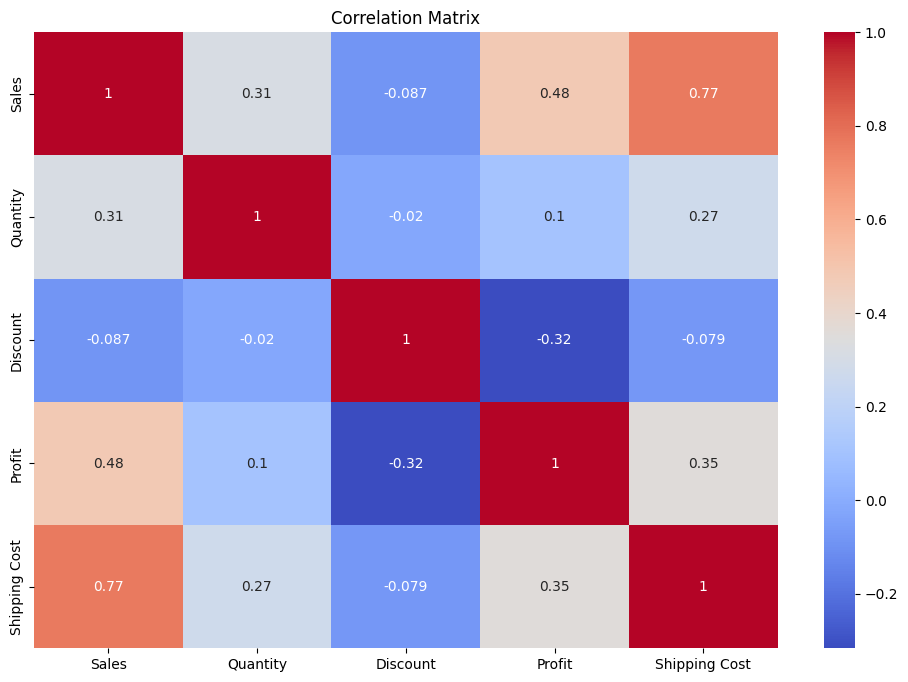

In [68]:
numeric_columns = ['Sales','Quantity','Discount','Profit','Shipping Cost']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

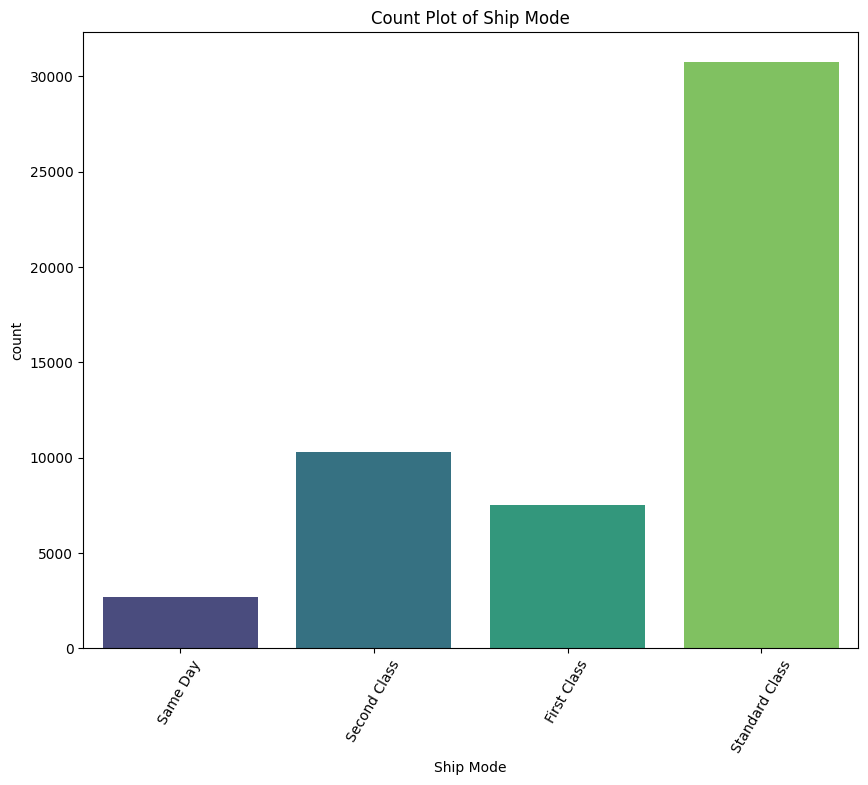

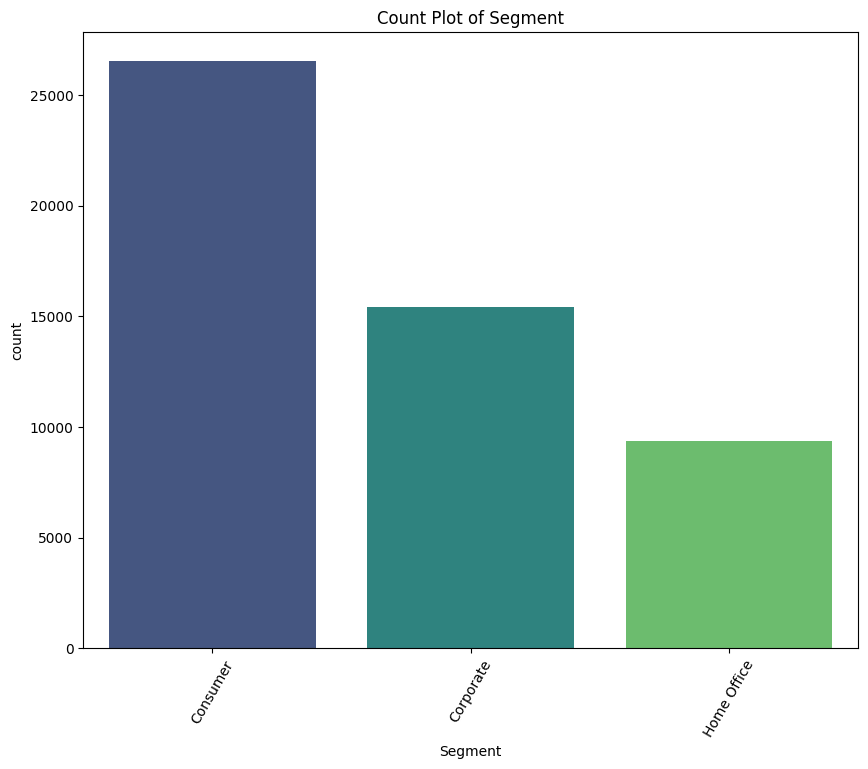

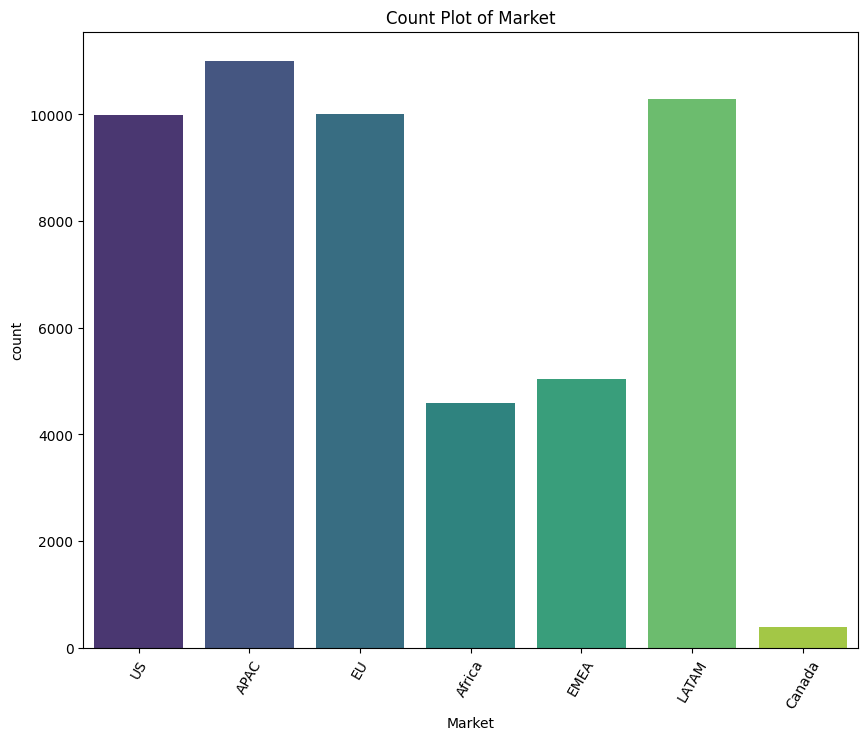

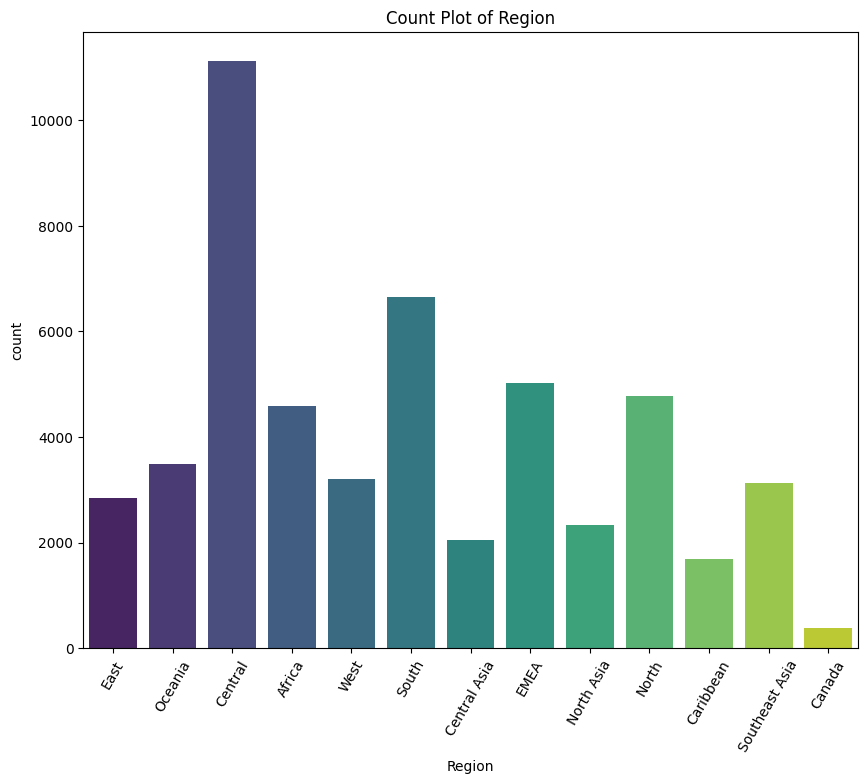

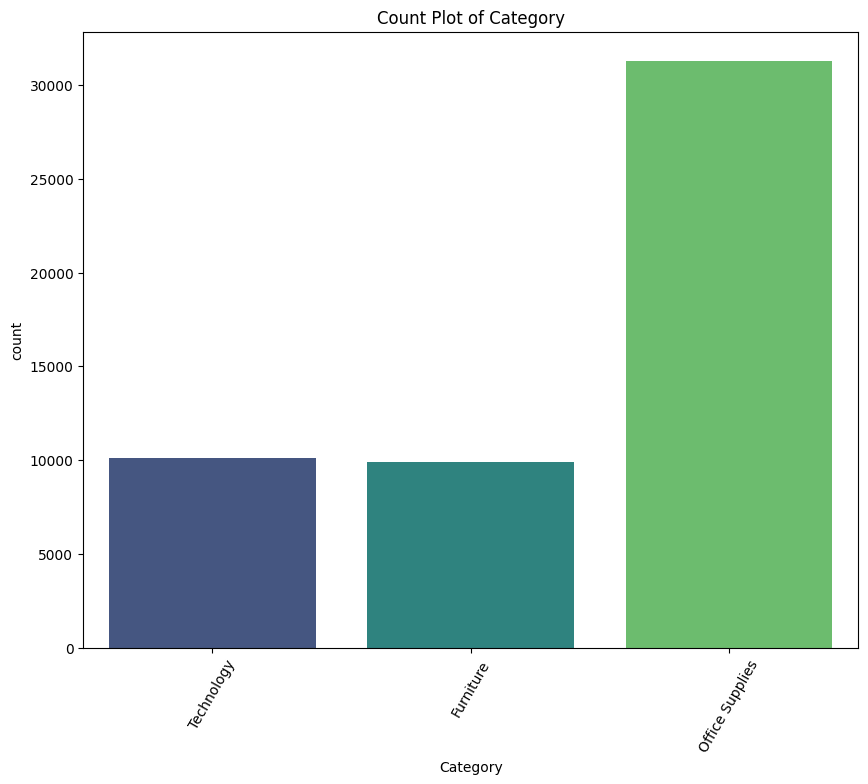

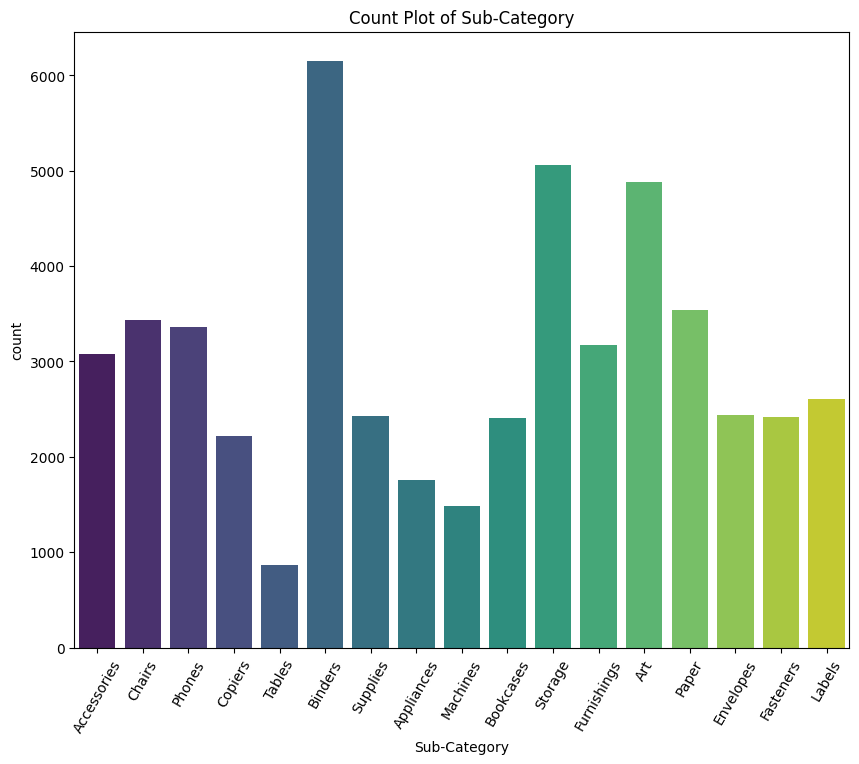

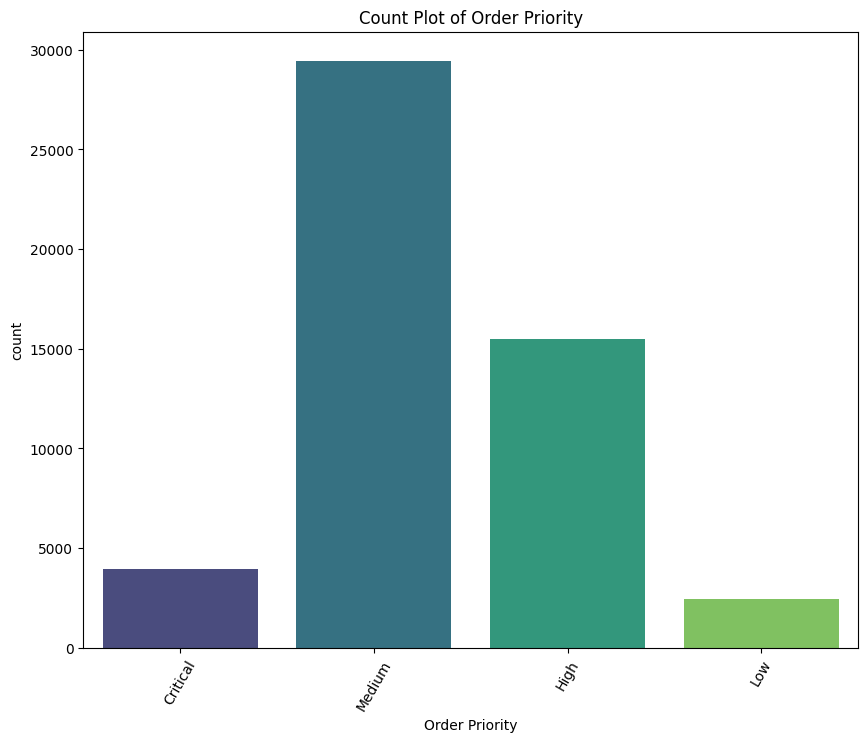

In [69]:
cat_cols = [col for col in df.columns if df[col].dtype == "object" and df[col].nunique() <= 20]
def cat_summary(df, col, plot=False):
    if plot:
        plt.figure(figsize=(10, 8))
        sns.countplot(x=col, data=df, hue=col, palette='viridis', legend=False)
        plt.xticks(rotation=60)
        plt.title(f'Count Plot of {col}')
        plt.show()
    else:
        summary = df[col].value_counts()
        print(f"Summary for {col}:\n{summary}\n")

for col in cat_cols:
    cat_summary(df, col, plot=True)

c:\Users\Nagarjuna\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


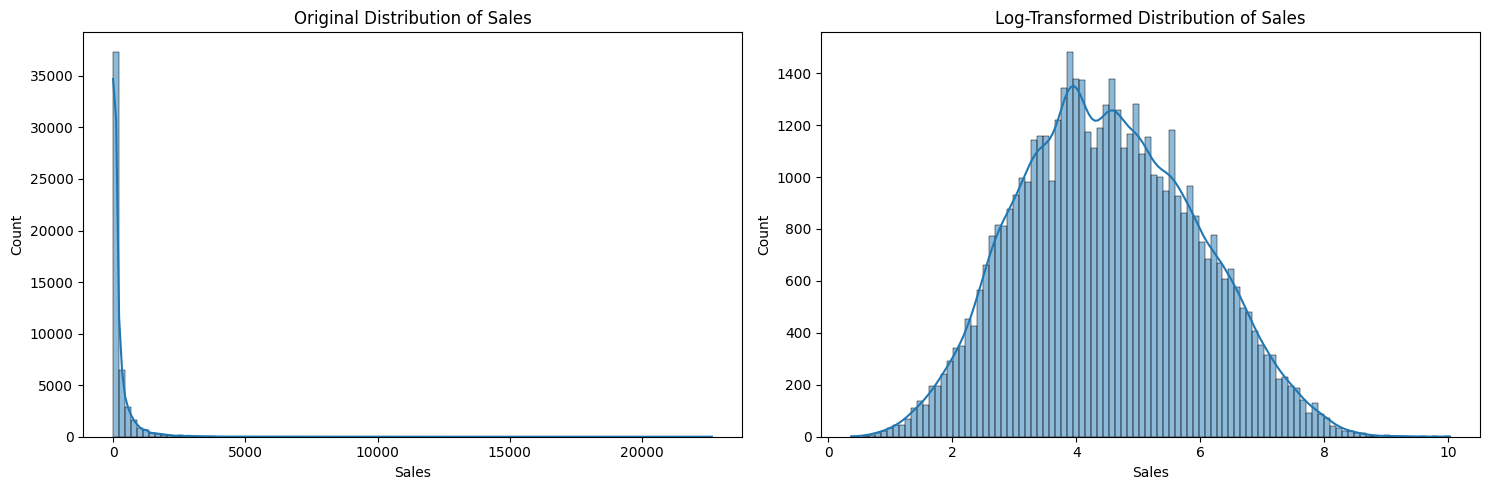

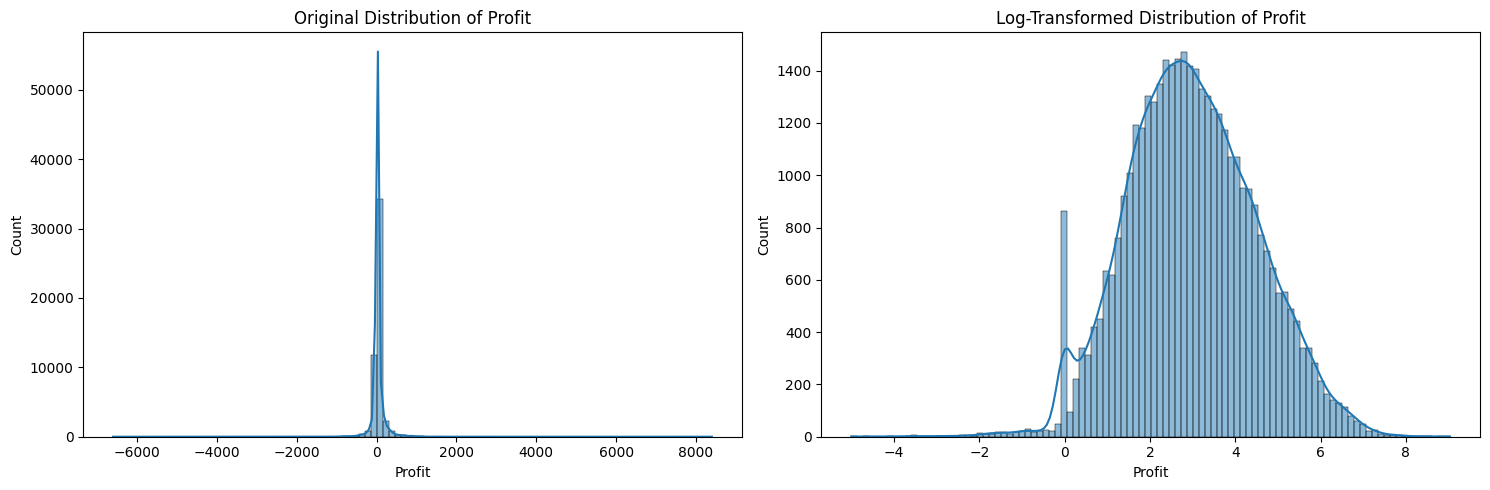

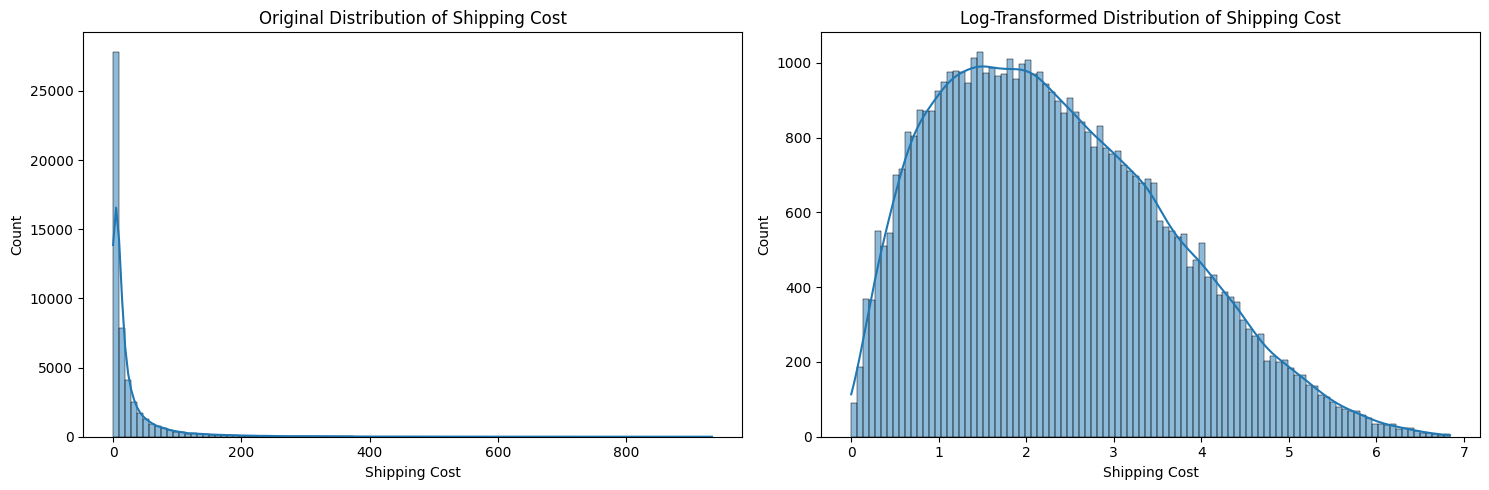

In [70]:
numerical_data = ['Sales', 'Profit', 'Shipping Cost']

skewness = df[numerical_data].skew()

df_log_transformed = df.copy()
for feature in numerical_data:
    if skewness[feature] > 0.5:  
        df_log_transformed[feature] = np.log1p(df_log_transformed[feature])
        
for feature in numerical_data:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[feature], bins=100, kde=True, ax=axes[0])
    axes[0].set_title(f'Original Distribution of {feature}')
    if skewness[feature] > 0.5:
        sns.histplot(df_log_transformed[feature], bins=100, kde=True, ax=axes[1])
        axes[1].set_title(f'Log-Transformed Distribution of {feature}')
    else:
        axes[1].set_visible(False)

    plt.tight_layout()

    plt.show()

In [10]:
columns_to_select = ['Order Date', 'Segment', 'Region', 'Sub-Category','Sales', 'Profit', 'Discount','Shipping Cost','Order Priority','Quantity'] 
df_selected = df[columns_to_select]
df_selected.head()

,Order Date,Segment,Region,Sub-Category,Sales,Profit,Discount,Shipping Cost,Order Priority,Quantity
0,2012-07-31,Consumer,East,Accessories,2309.650,762.1845,0.0,933.57,Critical,7
1,2013-02-05,Corporate,Oceania,Chairs,3709.395,-288.7650,0.1,923.63,Critical,9
2,2013-10-17,Consumer,Oceania,Phones,5175.171,919.9710,0.1,915.49,Medium,9
3,2013-01-28,Home Office,Central,Phones,2892.510,-96.5400,0.1,910.16,Medium,5
4,2013-11-05,Consumer,Africa,Copiers,2832.960,311.5200,0.0,903.04,Critical,8


In [11]:
df_selected.isnull().sum()

Order Date        0
Segment           0
Region            0
Sub-Category      0
Sales             0
Profit            0
Discount          0
Shipping Cost     0
Order Priority    0
Quantity          0
dtype: int64

In [12]:
encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(df_selected[['Segment','Sub-Category','Order Priority']]).toarray()
encoded_df_selected = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Segment','Sub-Category','Order Priority']), index=df_selected.index)
encoded_df_selected.head()

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
region_values = df['Region'].unique()
print(region_values)

['East' 'Oceania' 'Central' 'Africa' 'West' 'South' 'Central Asia' 'EMEA'
 'North Asia' 'North' 'Caribbean' 'Southeast Asia' 'Canada']


In [14]:
df_combined = pd.concat([df_selected,encoded_df_selected], axis=1)
df_combined.head()

,Order Date,Segment,Region,Sub-Category,Sales,Profit,Discount,Shipping Cost,Order Priority,Quantity,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2012-07-31,Consumer,East,Accessories,2309.650,762.1845,0.0,933.57,Critical,7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2013-02-05,Corporate,Oceania,Chairs,3709.395,-288.7650,0.1,923.63,Critical,9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2013-10-17,Consumer,Oceania,Phones,5175.171,919.9710,0.1,915.49,Medium,9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2013-01-28,Home Office,Central,Phones,2892.510,-96.5400,0.1,910.16,Medium,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2013-11-05,Consumer,Africa,Copiers,2832.960,311.5200,0.0,903.04,Critical,8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
df_combined = df_combined.drop(columns=['Segment','Sub-Category','Order Priority'])
df_combined.head()

,Order Date,Region,Sales,Profit,Discount,Shipping Cost,Quantity,Segment_Consumer,Segment_Corporate,Segment_Home Office,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2012-07-31,East,2309.650,762.1845,0.0,933.57,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2013-02-05,Oceania,3709.395,-288.7650,0.1,923.63,9,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2013-10-17,Oceania,5175.171,919.9710,0.1,915.49,9,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2013-01-28,Central,2892.510,-96.5400,0.1,910.16,5,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2013-11-05,Africa,2832.960,311.5200,0.0,903.04,8,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
df_combined = df_combined[df_combined['Profit']>0]

In [17]:
X = df_combined.drop(columns=['Profit'])
y = df_combined[['Order Date','Region','Profit']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [20]:
X_train_old = X_train.drop(columns=['Sales', 'Shipping Cost'])
X_test_old = X_test.drop(columns=['Sales', 'Shipping Cost'])

In [21]:
y_train_old = y_train.drop(columns=['Profit'])
y_test_old = y_test.drop(columns=['Profit'])


In [22]:
y_train.describe()

,Order Date,Profit
count,30462,30462.000000
mean,2013-05-11 20:12:34.461296128,62.944356
min,2011-01-01 00:00:00,0.036000
25%,2012-06-19 00:00:00,6.570000
50%,2013-07-08 00:00:00,18.720000
75%,2014-05-21 00:00:00,56.700000
max,2014-12-31 00:00:00,8399.976000
std,NaN,156.945359


In [23]:
y_test.describe()

,Order Date,Profit
count,7616,7616.000000
mean,2013-05-13 20:26:54.705882368,61.803110
min,2011-01-01 00:00:00,0.060000
25%,2012-06-26 00:00:00,6.480000
50%,2013-07-16 00:00:00,18.000000
75%,2014-05-28 00:00:00,54.720825
max,2014-12-31 00:00:00,6719.980800
std,NaN,161.358178


In [24]:
X_train_new = X_train[['Sales', 'Shipping Cost']]
X_test_new = X_test[['Sales', 'Shipping Cost']]

y_train_new = pd.DataFrame(y_train, columns=['Profit'])
y_test_new = pd.DataFrame(y_test, columns=['Profit'])

X_train_log = np.log(X_train_new)
X_test_log = np.log(X_test_new)

y_train_log = np.log(y_train_new)
y_test_log = np.log(y_test_new)


In [25]:
X_train_log = X_train_log.reset_index(drop=True)
X_train_old = X_train_old.reset_index(drop=True)

X_test_log = X_test_log.reset_index(drop=True)
X_test_old = X_test_old.reset_index(drop=True)

y_train_log = y_train_log.reset_index(drop=True)
y_train_old = y_train_old.reset_index(drop=True)

y_test_log = y_test_log.reset_index(drop=True)
y_test_old = y_test_old.reset_index(drop=True)

In [26]:
X_train_log = pd.concat([X_train_log,X_train_old[['Discount','Quantity']]], axis = 1)
X_test_log = pd.concat([X_test_log,X_test_old[['Discount','Quantity']]], axis = 1)

In [27]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_log)

X_test_scaled = scaler.transform(X_test_log)

y_train_scaled = scaler.fit_transform(y_train_log)

y_test_scaled = scaler.transform(y_test_log)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['Sales', 'Shipping Cost','Discount','Quantity'])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=['Sales', 'Shipping Cost','Discount','Quantity'])
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=['Profit'])
y_test_scaled_df = pd.DataFrame(y_test_scaled, columns=['Profit'])


In [28]:
X_train_scaled_df = X_train_scaled_df.reset_index(drop=True)
X_train_old = X_train_old.reset_index(drop=True)

X_test_scaled_df = X_test_scaled_df.reset_index(drop=True)
X_test_old = X_test_old.reset_index(drop=True)

y_train_scaled_df = y_train_scaled_df.reset_index(drop=True)
y_train_old = y_train_old.reset_index(drop=True)

y_test_scaled_df = y_test_scaled_df.reset_index(drop=True)
y_test_old = y_test_old.reset_index(drop=True)

In [29]:
X_train_scaled_df = pd.concat([X_train_scaled_df, X_train_old.drop(columns=['Discount','Quantity'])], axis=1)
X_test_scaled_df = pd.concat([X_test_scaled_df, X_test_old.drop(columns=['Discount','Quantity'])], axis=1)

In [30]:
y_train_scaled_df = pd.concat([y_train_scaled_df, y_train_old], axis=1)
y_test_scaled_df = pd.concat([y_test_scaled_df, y_test_old], axis=1)

In [31]:
X_train_scaled_df

,Sales,Shipping Cost,Discount,Quantity,Order Date,Region,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_Accessories,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,-0.521941,-0.651824,0.64576,-0.656413,2014-06-10,Oceania,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.265112,-0.275897,-0.49837,-1.096197,2014-02-21,Africa,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.805320,-0.943729,1.78989,1.102722,2013-05-15,South,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.674511,0.510168,-0.49837,-0.216629,2013-08-30,Central,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.878809,0.611752,0.64576,0.223155,2014-05-31,Oceania,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,0.404255,0.131785,-0.49837,-1.096197,2014-11-19,EMEA,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30458,1.009785,1.011960,-0.49837,-0.216629,2014-10-06,North,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
30459,0.311483,0.546057,-0.49837,-0.216629,2013-03-22,Central,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30460,2.473534,1.998085,-0.49837,0.662938,2014-08-15,Central,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
df_combined['Region'].unique()

array(['East', 'Oceania', 'Africa', 'West', 'South', 'Central Asia',
       'EMEA', 'North Asia', 'Central', 'North', 'Canada',
       'Southeast Asia', 'Caribbean'], dtype=object)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

for region in df_combined['Region'].unique():
        X_train_region = X_train_scaled_df[X_train_scaled_df['Region'] == region]
        y_train_region = y_train_scaled_df[y_train_scaled_df['Region'] == region]

        aggregated_data_y_train = y_train_region.groupby('Order Date').agg({
        'Profit': 'mean',
        }).reset_index()

        aggregated_data_X_train = X_train_region.groupby('Order Date').agg({
        'Sales': 'mean',
        'Quantity': 'mean',
        'Segment_Consumer': 'sum',
        'Segment_Corporate': 'sum',
        'Segment_Home Office': 'sum',
        'Sub-Category_Accessories': 'sum',
        'Sub-Category_Appliances': 'sum',
        'Sub-Category_Art': 'sum',
        'Sub-Category_Binders': 'sum',
        'Sub-Category_Bookcases': 'sum',
        'Sub-Category_Tables': 'sum',
        'Sub-Category_Chairs': 'sum',
        'Sub-Category_Phones': 'sum',
        'Sub-Category_Copiers': 'sum',
        'Sub-Category_Supplies': 'sum',
        'Sub-Category_Machines': 'sum',
        'Sub-Category_Storage': 'sum',
        'Sub-Category_Furnishings': 'sum',
        'Sub-Category_Paper': 'sum',
        'Sub-Category_Envelopes': 'sum',
        'Sub-Category_Fasteners': 'sum',
        'Sub-Category_Labels': 'sum',
        'Order Priority_Critical': 'sum',
        'Order Priority_High': 'sum',
        'Order Priority_Low': 'sum',
        'Order Priority_Medium': 'sum'
        }).reset_index()

        aggregated_data_X_train = aggregated_data_X_train.drop(columns=['Order Date'])
        aggregated_data_y_train = aggregated_data_y_train.drop(columns=['Order Date'])

        linear = LinearRegression()
        reg_train = linear.fit(aggregated_data_X_train , aggregated_data_y_train)
        y_pred = linear.predict(aggregated_data_X_train)
        mse = mean_squared_error(aggregated_data_y_train, y_pred)
        r2 = r2_score(aggregated_data_y_train, y_pred)
        print(f"For {region} Mean Squared Error (MSE): {mse}")
        print(f"R^2 Score: {r2}")
        num_rows = aggregated_data_X_train.shape[0]
        print(num_rows)


For East Mean Squared Error (MSE): 0.09855130843431588
R^2 Score: 0.839428868988209
676
For Oceania Mean Squared Error (MSE): 0.19719535019356058
R^2 Score: 0.6867156828648546
726
For Africa Mean Squared Error (MSE): 0.14505323216678576
R^2 Score: 0.697232889301719
840
For West Mean Squared Error (MSE): 0.08455143967804112
R^2 Score: 0.7960563334377441
755
For South Mean Squared Error (MSE): 0.11419142946954508
R^2 Score: 0.7368029187955071
1023
For Central Asia Mean Squared Error (MSE): 0.14233764478039265
R^2 Score: 0.731843595392743
564
For EMEA Mean Squared Error (MSE): 0.164569933240104
R^2 Score: 0.6711904460636535
830
For North Asia Mean Squared Error (MSE): 0.19240604629830996
R^2 Score: 0.686723711185875
637
For Central Mean Squared Error (MSE): 0.09830841307885868
R^2 Score: 0.7218856133388235
1184
For North Mean Squared Error (MSE): 0.17981544483204456
R^2 Score: 0.6507075815215891
919
For Canada Mean Squared Error (MSE): 0.20564209900358874
R^2 Score: 0.6700491225636369
161

In [34]:
for region in df_combined['Region'].unique():
        X_test_region = X_test_scaled_df[X_test_scaled_df['Region'] == region]
        y_test_region = y_test_scaled_df[y_test_scaled_df['Region'] == region]

        aggregated_data_y_test = y_test_region.groupby('Order Date').agg({
        'Profit': 'mean',
        }).reset_index()

        aggregated_data_X_test = X_test_region.groupby('Order Date').agg({
        'Sales': 'mean',
        'Quantity': 'mean',
        'Segment_Consumer': 'sum',
        'Segment_Corporate': 'sum',
        'Segment_Home Office': 'sum',
        'Sub-Category_Accessories': 'sum',
        'Sub-Category_Appliances': 'sum',
        'Sub-Category_Art': 'sum',
        'Sub-Category_Binders': 'sum',
        'Sub-Category_Bookcases': 'sum',
        'Sub-Category_Tables': 'sum',
        'Sub-Category_Chairs': 'sum',
        'Sub-Category_Phones': 'sum',
        'Sub-Category_Copiers': 'sum',
        'Sub-Category_Supplies': 'sum',
        'Sub-Category_Machines': 'sum',
        'Sub-Category_Storage': 'sum',
        'Sub-Category_Furnishings': 'sum',
        'Sub-Category_Paper': 'sum',
        'Sub-Category_Envelopes': 'sum',
        'Sub-Category_Fasteners': 'sum',
        'Sub-Category_Labels': 'sum',
        'Order Priority_Critical': 'sum',
        'Order Priority_High': 'sum',
        'Order Priority_Low': 'sum',
        'Order Priority_Medium': 'sum'
    }).reset_index()

        aggregated_data_X_test = aggregated_data_X_test.drop(columns=['Order Date'])
        aggregated_data_y_test = aggregated_data_y_test.drop(columns=['Order Date'])

        linear = LinearRegression()
        reg_train = linear.fit(aggregated_data_X_train , aggregated_data_y_train)
        y_pred = linear.predict(aggregated_data_X_test)
        mse = mean_squared_error(aggregated_data_y_test, y_pred)
        r2 = r2_score(aggregated_data_y_test, y_pred)
        print(f"For region {region} Mean Squared Error (MSE): {mse}")
        print(f"R^2 Score: {r2}")


For region East Mean Squared Error (MSE): 0.20151423759051584
R^2 Score: 0.7706533042610311
For region Oceania Mean Squared Error (MSE): 0.24579397636974676
R^2 Score: 0.7506110384434158
For region Africa Mean Squared Error (MSE): 0.2364980657220883
R^2 Score: 0.6972558696309272
For region West Mean Squared Error (MSE): 0.24221089271801
R^2 Score: 0.6464731305331066
For region South Mean Squared Error (MSE): 0.26872681776426216
R^2 Score: 0.6188098070246286
For region Central Asia Mean Squared Error (MSE): 0.27910711500319824
R^2 Score: 0.6903057661895885
For region EMEA Mean Squared Error (MSE): 0.2698956003536338
R^2 Score: 0.662126518183382
For region North Asia Mean Squared Error (MSE): 0.2568071792403772
R^2 Score: 0.694615949596977
For region Central Mean Squared Error (MSE): 0.22910643731649874
R^2 Score: 0.6329763509884985
For region North Mean Squared Error (MSE): 0.30566997620811615
R^2 Score: 0.6268272060940991
For region Canada Mean Squared Error (MSE): 0.37954841087194985


In [35]:

for region in df_combined['Region'].unique():
    # Filter the train data by region
    X_train_region = X_train_scaled_df[X_train_scaled_df['Region'] == region]
    y_train_region = y_train_scaled_df[y_train_scaled_df['Region'] == region]

    # Aggregate the data by date
    aggregated_data_y_train = y_train_region.groupby('Order Date').agg({
        'Profit': 'mean',
    }).reset_index()

    aggregated_data_X_train = X_train_region.groupby('Order Date').agg({
        'Sales': 'mean',
        'Quantity': 'mean',
        'Segment_Consumer': 'sum',
        'Segment_Corporate': 'sum',
        'Segment_Home Office': 'sum',
        'Sub-Category_Accessories': 'sum',
        'Sub-Category_Appliances': 'sum',
        'Sub-Category_Art': 'sum',
        'Sub-Category_Binders': 'sum',
        'Sub-Category_Bookcases': 'sum',
        'Sub-Category_Tables': 'sum',
        'Sub-Category_Chairs': 'sum',
        'Sub-Category_Phones': 'sum',
        'Sub-Category_Copiers': 'sum',
        'Sub-Category_Supplies': 'sum',
        'Sub-Category_Machines': 'sum',
        'Sub-Category_Storage': 'sum',
        'Sub-Category_Furnishings': 'sum',
        'Sub-Category_Paper': 'sum',
        'Sub-Category_Envelopes': 'sum',
        'Sub-Category_Fasteners': 'sum',
        'Sub-Category_Labels': 'sum',
        'Order Priority_Critical': 'sum',
        'Order Priority_High': 'sum',
        'Order Priority_Low': 'sum',
        'Order Priority_Medium': 'sum'
    }).reset_index()

    # Create lagged features by shifting the features by one day
    lagged_data_X_train = aggregated_data_X_train.copy()
    lagged_data_X_train['Order Date'] = lagged_data_X_train['Order Date'] + pd.DateOffset(days=1)

    # Rename lagged columns
    lagged_columns = {col: f'{col}_lag1' for col in lagged_data_X_train.columns if col != 'Order Date'}
    lagged_data_X_train = lagged_data_X_train.rename(columns=lagged_columns)

    # Merge the lagged data with the target variable
    merged_data_train = pd.merge(aggregated_data_y_train, lagged_data_X_train, on='Order Date', how='inner')

    # Drop rows with missing values after merging
    merged_data_train = merged_data_train.dropna()

    # Separate features and target
    X_train = merged_data_train.drop(columns=['Order Date', 'Profit'])
    y_train = merged_data_train['Profit']

    # Check if there's enough data to train the model
    if X_train.empty or y_train.empty:
        print(f"No data available for region {region} after processing.")
        continue

    # Train the model
    linear = LinearRegression()
    linear.fit(X_train, y_train)

    # Predict and evaluate the model
    y_pred = linear.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    print(f"For region {region} Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    

For region East Mean Squared Error (MSE): 0.5788833664210686
R^2 Score: 0.06211423948748396
For region Oceania Mean Squared Error (MSE): 0.5592663373489287
R^2 Score: 0.03721024056805555
For region Africa Mean Squared Error (MSE): 0.4354936157551037
R^2 Score: 0.061021169360793825
For region West Mean Squared Error (MSE): 0.3882992806036997
R^2 Score: 0.04521566268382782
For region South Mean Squared Error (MSE): 0.4146733274467368
R^2 Score: 0.020961326902803057
For region Central Asia Mean Squared Error (MSE): 0.5471045751815209
R^2 Score: 0.04865128039259725
For region EMEA Mean Squared Error (MSE): 0.471706706885516
R^2 Score: 0.04155133465328087
For region North Asia Mean Squared Error (MSE): 0.6007437850268442
R^2 Score: 0.05019824376573412
For region Central Mean Squared Error (MSE): 0.33445807834500485
R^2 Score: 0.024740502036101564
For region North Mean Squared Error (MSE): 0.46110112945866033
R^2 Score: 0.03307211732091775
For region Canada Mean Squared Error (MSE): 9.485630

In [36]:
for region in df_combined['Region'].unique():
    X_test_region = X_test_scaled_df[X_test_scaled_df['Region'] == region]
    y_test_region = y_test_scaled_df[y_test_scaled_df['Region'] == region]

    aggregated_data_y_test = y_test_region.groupby('Order Date').agg({
        'Profit': 'mean',
    }).reset_index()

    aggregated_data_X_test = X_test_region.groupby('Order Date').agg({
        'Sales': 'mean',
        'Quantity': 'mean',
        'Segment_Consumer': 'sum',
        'Segment_Corporate': 'sum',
        'Segment_Home Office': 'sum',
        'Sub-Category_Accessories': 'sum',
        'Sub-Category_Appliances': 'sum',
        'Sub-Category_Art': 'sum',
        'Sub-Category_Binders': 'sum',
        'Sub-Category_Bookcases': 'sum',
        'Sub-Category_Tables': 'sum',
        'Sub-Category_Chairs': 'sum',
        'Sub-Category_Phones': 'sum',
        'Sub-Category_Copiers': 'sum',
        'Sub-Category_Supplies': 'sum',
        'Sub-Category_Machines': 'sum',
        'Sub-Category_Storage': 'sum',
        'Sub-Category_Furnishings': 'sum',
        'Sub-Category_Paper': 'sum',
        'Sub-Category_Envelopes': 'sum',
        'Sub-Category_Fasteners': 'sum',
        'Sub-Category_Labels': 'sum',
        'Order Priority_Critical': 'sum',
        'Order Priority_High': 'sum',
        'Order Priority_Low': 'sum',
        'Order Priority_Medium': 'sum'
    }).reset_index()

    # Create lagged features by shifting the features by one day
    lagged_data_X_test = aggregated_data_X_test.copy()
    lagged_data_X_test['Order Date'] = lagged_data_X_test['Order Date'] + pd.DateOffset(days=1)

    # Rename lagged columns
    lagged_columns = {col: f'{col}_lag1' for col in lagged_data_X_test.columns if col != 'Order Date'}
    lagged_data_X_test = lagged_data_X_test.rename(columns=lagged_columns)

    # Merge the lagged data with the target variable
    merged_data_test = pd.merge(aggregated_data_y_test, lagged_data_X_test, on='Order Date', how='inner')

    # Drop rows with missing values after merging
    merged_data_test = merged_data_test.dropna()

    # Separate features and target
    X_test = merged_data_test.drop(columns=['Order Date', 'Profit'])
    y_test = merged_data_test['Profit']

    # Train the model
    linear = LinearRegression()
    linear.fit(X_train, y_train)

    # Predict and evaluate the model
    y_pred = linear.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"For region {region} Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")


For region East Mean Squared Error (MSE): 1.4939820917112534
R^2 Score: -0.6874320092024018
For region Oceania Mean Squared Error (MSE): 1.242144436271363
R^2 Score: -0.7053643967910572
For region Africa Mean Squared Error (MSE): 1.8289210325842955
R^2 Score: -1.139888744531647
For region West Mean Squared Error (MSE): 1.2065589359479645
R^2 Score: -0.9846679522703237
For region South Mean Squared Error (MSE): 1.2871922730906873
R^2 Score: -0.9764986499394934
For region Central Asia Mean Squared Error (MSE): 1.531805143739138
R^2 Score: -0.42528576812017205
For region EMEA Mean Squared Error (MSE): 1.2069722267250673
R^2 Score: -0.7217025370881978
For region North Asia Mean Squared Error (MSE): 2.030716147442076
R^2 Score: -1.737688541772492
For region Central Mean Squared Error (MSE): 1.470486206174594
R^2 Score: -1.375288379724254
For region North Mean Squared Error (MSE): 1.5409228734419236
R^2 Score: -1.006129893959017
For region Canada Mean Squared Error (MSE): 1.411263550831789
R

Logistic Regression

In [37]:
df_selected.head()

,Order Date,Segment,Region,Sub-Category,Sales,Profit,Discount,Shipping Cost,Order Priority,Quantity
0,2012-07-31,Consumer,East,Accessories,2309.650,762.1845,0.0,933.57,Critical,7
1,2013-02-05,Corporate,Oceania,Chairs,3709.395,-288.7650,0.1,923.63,Critical,9
2,2013-10-17,Consumer,Oceania,Phones,5175.171,919.9710,0.1,915.49,Medium,9
3,2013-01-28,Home Office,Central,Phones,2892.510,-96.5400,0.1,910.16,Medium,5
4,2013-11-05,Consumer,Africa,Copiers,2832.960,311.5200,0.0,903.04,Critical,8


In [38]:
encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(df_selected[['Segment','Sub-Category','Region']]).toarray()
encoded_df_selected = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Segment','Sub-Category','Region']), index=df_selected.index)
encoded_df_selected.head()

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,...,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_combined1 = pd.concat([df_selected,encoded_df_selected], axis=1)

In [40]:
df_combined1 = df_combined1.drop(columns=['Segment','Sub-Category','Region'])

In [41]:
df_combined1 = df_combined1[df_combined1['Profit']>0]

In [42]:
df_combined1['Year'] = df_combined1['Order Date'].dt.year
df_combined1['Month'] = df_combined1['Order Date'].dt.month
df_combined1['Day'] = df_combined1['Order Date'].dt.day


In [43]:
df_combined1['Month_Sin'] = np.sin(2 * np.pi * df_combined1['Month'] / 12)
df_combined1['Month_Cos'] = np.cos(2 * np.pi * df_combined1['Month'] / 12)

In [44]:
df_combined1 = df_combined1.drop(columns = ['Year','Month','Day'])

In [45]:
X = df_combined1.drop(columns=['Order Priority'])
y = df_combined1[['Order Date','Order Priority']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

In [48]:
y_train = pd.DataFrame(y_train, columns=y_train.columns)
y_test = pd.DataFrame(y_test, columns=y_test.columns)

In [49]:
X_train_old = X_train.drop(columns=['Sales', 'Shipping Cost','Profit'])
X_test_old = X_test.drop(columns=['Sales', 'Shipping Cost','Profit'])

In [50]:
X_train_new = X_train[['Sales', 'Shipping Cost','Profit']]
X_test_new = X_test[['Sales', 'Shipping Cost','Profit']]


X_train_log = np.log(X_train_new)
X_test_log = np.log(X_test_new)

In [51]:
X_train_log = X_train_log.reset_index(drop=True)
X_train_old = X_train_old.reset_index(drop=True)

X_test_log = X_test_log.reset_index(drop=True)
X_test_old = X_test_old.reset_index(drop=True)

In [52]:
X_train_log = pd.concat([X_train_log,X_train_old[['Discount','Quantity']]], axis = 1)
X_test_log = pd.concat([X_test_log,X_test_old[['Discount','Quantity']]], axis = 1)

In [53]:
X_test_log.describe()

,Sales,Shipping Cost,Profit,Discount,Quantity
count,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000
mean,4.568639,2.162754,2.929154,0.042367,3.494748
std,1.412891,1.569343,1.578644,0.085579,2.294525
min,-0.010050,-6.214608,-2.813411,0.000000,1.000000
25%,3.515418,1.064711,1.868721,0.000000,2.000000
50%,4.503137,2.107786,2.890372,0.000000,3.000000
75%,5.571633,3.277993,4.002244,0.000000,5.000000
max,9.546810,6.796567,8.812841,0.470000,14.000000


In [54]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_log)

X_test_scaled = scaler.transform(X_test_log)


X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['Sales', 'Shipping Cost','Discount','Quantity','Profit'])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=['Sales', 'Shipping Cost','Discount','Quantity','Profit'])

In [55]:
X_train_scaled_df = X_train_scaled_df.reset_index(drop=True)
X_train_old = X_train_old.reset_index(drop=True)

X_test_scaled_df = X_test_scaled_df.reset_index(drop=True)
X_test_old = X_test_old.reset_index(drop=True)

In [56]:
X_train_scaled_df = pd.concat([X_train_scaled_df, X_train_old.drop(columns=['Discount','Quantity'])], axis=1)
X_test_scaled_df = pd.concat([X_test_scaled_df, X_test_old.drop(columns=['Discount','Quantity'])], axis=1)

In [57]:
X_train_scaled_df = X_train_scaled_df.drop(columns=['Order Date'])
X_test_scaled_df = X_test_scaled_df.drop(columns=['Order Date'])

In [58]:
model1 = LogisticRegression()
log = model1.fit(X_train_scaled_df, y_train['Order Priority'])

y_pred = log.predict(X_test_scaled_df)
y_pred_train = log.predict(X_train_scaled_df)

print(metrics.accuracy_score(y_train['Order Priority'], y_pred_train),
      metrics.f1_score(y_train['Order Priority'], y_pred_train, average='macro'))


print(metrics.accuracy_score(y_test['Order Priority'], y_pred),
      metrics.f1_score(y_test['Order Priority'], y_pred, average='macro'))

0.7299914647757862 0.5110347290700497
0.7337184873949579 0.5051619515560419


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model3 = DecisionTreeClassifier()
dc = model3.fit(X_train_scaled_df, y_train['Order Priority'])

y_pred = dc.predict(X_test_scaled_df)
y_pred_train = dc.predict(X_train_scaled_df)

print(metrics.accuracy_score(y_train['Order Priority'], y_pred_train),
      metrics.f1_score(y_train['Order Priority'], y_pred_train, average='macro'))


print(metrics.accuracy_score(y_test['Order Priority'], y_pred),
      metrics.f1_score(y_test['Order Priority'], y_pred, average='macro'))

1.0 1.0
0.5992647058823529 0.4308067558908514


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model4 = RandomForestClassifier()
rf = model4.fit(X_train_scaled_df, y_train['Order Priority'])

y_pred_train_rf = rf.predict(X_train_scaled_df)
y_pred_test_rf = rf.predict(X_test_scaled_df)

print("Random Forest - Training Accuracy:", metrics.accuracy_score(y_train['Order Priority'], y_pred_train_rf))
print("Random Forest - Training F1 Score:", metrics.f1_score(y_train['Order Priority'], y_pred_train_rf, average='macro'))
print("Random Forest - Test Accuracy:", metrics.accuracy_score(y_test['Order Priority'], y_pred_test_rf))
print("Random Forest - Test F1 Score:", metrics.f1_score(y_test['Order Priority'], y_pred_test_rf, average='macro'))

Random Forest - Training Accuracy: 1.0
Random Forest - Training F1 Score: 1.0
Random Forest - Test Accuracy: 0.6938025210084033
Random Forest - Test F1 Score: 0.433320154367346


In [61]:
from sklearn.svm import  SVC
model2 = SVC(kernel = 'rbf', C=1000, gamma=1)
svm = model2.fit(X_train_scaled_df, y_train['Order Priority'])

y_pred = svm.predict(X_test_scaled_df)
y_pred_train = svm.predict(X_train_scaled_df)

print(metrics.accuracy_score(y_train['Order Priority'], y_pred_train),
      metrics.f1_score(y_train['Order Priority'], y_pred_train, average='macro'))


print(metrics.accuracy_score(y_test['Order Priority'], y_pred),
      metrics.f1_score(y_test['Order Priority'], y_pred, average='macro'))

0.9999015166436872 0.9999375766979236
0.5852153361344538 0.3602930076162397


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
folds = KFold(n_splits=5, shuffle=True, random_state=7)
model = SVC()

params = {'C': [0.1, 1, 10, 100, 1000, 10000, 20000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

c_opt = GridSearchCV(estimator=model, param_grid=params,
                     scoring='f1_macro', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train_scaled_df, y_train['Order Priority'])
c_results = pd.DataFrame(c_opt.cv_results_)
c_results

Fitting 5 folds for each of 35 candidates, totalling 175 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1197.001943,15.756995,436.444665,13.452099,0.1,1.0000,"{'C': 0.1, 'gamma': 1}",0.182195,0.181578,0.182332,...,0.182169,0.000304,34,0.182162,0.182316,0.182128,0.182134,0.182103,0.182169,0.000076
1,1168.653949,22.110795,460.976040,19.736135,0.1,0.1000,"{'C': 0.1, 'gamma': 0.1}",0.182195,0.181578,0.182332,...,0.182169,0.000304,34,0.182162,0.182316,0.182128,0.182134,0.182103,0.182169,0.000076
2,691.927080,425.536677,247.171487,143.913174,0.1,0.0100,"{'C': 0.1, 'gamma': 0.01}",0.188766,0.184681,0.185910,...,0.186965,0.001496,33,0.190812,0.189986,0.188555,0.189106,0.191786,0.190049,0.001160
3,345.739641,4.406528,130.266079,1.174747,0.1,0.0010,"{'C': 0.1, 'gamma': 0.001}",0.190142,0.185915,0.186820,...,0.188401,0.001763,31,0.191992,0.190838,0.190116,0.192140,0.192570,0.191531,0.000911
4,332.437360,28.657892,120.937619,25.302788,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.190142,0.185915,0.186820,...,0.188401,0.001763,31,0.191992,0.190838,0.190116,0.192140,0.192570,0.191531,0.000911
5,310.981124,4.225300,72.516338,0.950649,1.0,1.0000,"{'C': 1, 'gamma': 1}",0.195799,0.190827,0.192754,...,0.191532,0.002517,30,0.977523,0.978361,0.978459,0.979985,0.977006,0.978267,0.001014
6,307.416854,3.415198,72.941612,0.589818,1.0,0.1000,"{'C': 1, 'gamma': 0.1}",0.323675,0.310319,0.328120,...,0.321147,0.006802,16,0.627753,0.617436,0.633920,0.622932,0.629396,0.626287,0.005651
7,315.799076,9.126804,71.413686,0.603677,1.0,0.0100,"{'C': 1, 'gamma': 0.01}",0.258356,0.257157,0.266337,...,0.260717,0.003445,29,0.304860,0.295578,0.303537,0.304870,0.302078,0.302185,0.003460
8,316.733393,2.677185,71.151938,0.690092,1.0,0.0010,"{'C': 1, 'gamma': 0.001}",0.256739,0.262998,0.265465,...,0.262582,0.004086,28,0.297628,0.288779,0.297856,0.297382,0.295025,0.295334,0.003432
9,315.958940,7.142104,79.629856,17.481699,1.0,0.0001,"{'C': 1, 'gamma': 0.0001}",0.256576,0.262896,0.265376,...,0.262689,0.003952,26,0.297844,0.289182,0.297706,0.297452,0.295252,0.295487,0.003291


In [ ]:
print(f'Best Score: {0.446347}')
print('Best Parameters: {"C": 100, "gamma": 1}')

Best Score: 0.446347
Best Parameters: {"C": 100, "gamma": 1}


In [683]:
from sklearn.svm import  SVC
model2 = SVC(kernel = 'rbf', C=100, gamma=1)
model2.fit(X_train_scaled_df, y_train['Order Priority'])

y_pred = model2.predict(X_test_scaled_df)
y_pred_train = model2.predict(X_train_scaled_df)

print(metrics.accuracy_score(y_train['Order Priority'], y_pred_train),
      metrics.f1_score(y_test['Order Priority'], y_pred, average='macro'))


print(metrics.accuracy_score(y_test['Order Priority'], y_pred),
      metrics.f1_score(y_test['Order Priority'], y_pred, average='macro'))